In [49]:
# Import Necessary Libiraries
import os
import numpy as np
from google.colab import drive
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

In [12]:
import tensorflow as tf; print(tf.__version__)

2.12.0


In [2]:
# Checking whether the GPU Device is selected or not

%tensorflow_version 2.x
#tf library for deep learning
device_name = tf.test.gpu_device_name()

if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')

print('Found GPU at: {}'.format(device_name))


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


# Data Understanding

In [1]:
# connect google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
train_dir = "/content/drive/MyDrive/Smart Attendance (CV-Batch-7 )/data/train"
test_dir  = "/content/drive/MyDrive/Smart Attendance (CV-Batch-7 )/data/test"

In [5]:
os.listdir(train_dir+"/NuNuHlaing")

['Nu Nu Hlaing_train_face19 (1).jpg',
 'Nu Nu Hlaing_train_face20 (1).jpg',
 'Nu Nu Hlaing_train_face196.jpg',
 'Nu Nu Hlaing_train_face198.jpg',
 'Nu Nu Hlaing_train_face197.jpg',
 'Nu Nu Hlaing_train_face199.jpg',
 'Nu Nu Hlaing_train_face59 (1).jpg',
 'Nu Nu Hlaing_train_face65 (1).jpg',
 'Nu Nu Hlaing_train_face66 (1).jpg',
 'Nu Nu Hlaing_train_face67 (1).jpg',
 'Nu Nu Hlaing_train_face0.jpg',
 'Nu Nu Hlaing_train_face1 (1).jpg',
 'Nu Nu Hlaing_train_face2 (1).jpg',
 'Nu Nu Hlaing_train_face3 (1).jpg',
 'Nu Nu Hlaing_train_face4 (1).jpg',
 'Nu Nu Hlaing_train_face5 (1).jpg',
 'Nu Nu Hlaing_train_face6 (1).jpg',
 'Nu Nu Hlaing_train_face7 (1).jpg',
 'Nu Nu Hlaing_train_face8 (1).jpg',
 'Nu Nu Hlaing_train_face9 (1).jpg',
 'Nu Nu Hlaing_train_face10 (1).jpg',
 'Nu Nu Hlaing_train_face11 (1).jpg',
 'Nu Nu Hlaing_train_face50.jpg',
 'Nu Nu Hlaing_train_face52.jpg',
 'Nu Nu Hlaing_train_face100.jpg',
 'Nu Nu Hlaing_train_face101.jpg',
 'Nu Nu Hlaing_train_face132.jpg',
 'Nu Nu Hlaing_tr

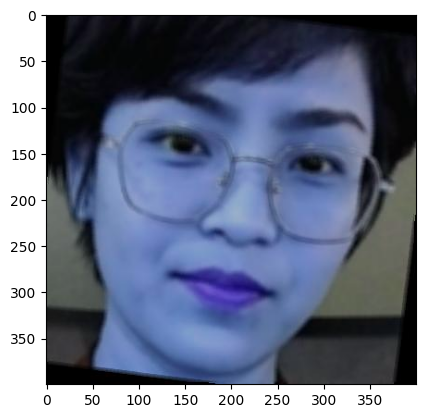

In [6]:
import cv2
image = cv2.imread(train_dir+"/NuNuHlaing"+"/Nu Nu Hlaing_train_face (4).jpg")

import matplotlib.pyplot as plt   #matplotlib is good for map and chart
plt.imshow(image)

In [7]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

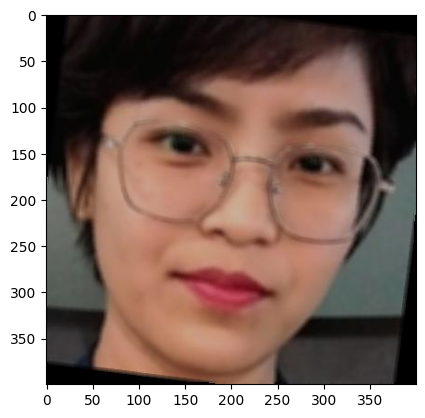

In [8]:
plt.imshow(image_rgb)

# Data Preprocessing

In [9]:
# All images will be rescaled by 1./255.
datagen_train = ImageDataGenerator( rescale = 1.0/255. )
datagen_test = ImageDataGenerator( rescale = 1.0/255. )

batch_size = 5

train_set = datagen_train.flow_from_directory(train_dir,
                                            target_size = (50,100),
                                            #color_mode="grayscale",
                                             batch_size = batch_size,
                                            class_mode = "categorical", #if more than 2 categories: categorical, 2 categories: binary
                                            shuffle = True)
test_set = datagen_test.flow_from_directory(test_dir,
                                       target_size = (50,100),
                                       #color_mode="grayscale",
                                       batch_size = batch_size,
                                       class_mode = "categorical",
                                       shuffle = False)



Found 936 images belonging to 3 classes.
Found 234 images belonging to 3 classes.


# Modeling (KNN)

In [38]:
# 5. Neural Network Implemenation
#
neuralN_model  = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape = (50, 100, 3)),
        tf.keras.layers.Dense(100,activation=tf.nn.relu),
        tf.keras.layers.Dense(2000,activation=tf.nn.relu),
        tf.keras.layers.Dense(3,activation=tf.nn.softmax)
])


In [39]:
neuralN_model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics =['acc'])

In [35]:
train_set.image_shape

(50, 100, 3)

In [40]:
neuralN_model.fit(train_set, epochs = 10, verbose = 2, shuffle  = False)

Epoch 1/10
188/188 - 7s - loss: 0.3995 - acc: 0.8429 - 7s/epoch - 37ms/step
Epoch 2/10
188/188 - 8s - loss: 0.1638 - acc: 0.9498 - 8s/epoch - 45ms/step
Epoch 3/10
188/188 - 6s - loss: 0.0299 - acc: 0.9915 - 6s/epoch - 29ms/step
Epoch 4/10
188/188 - 7s - loss: 0.1015 - acc: 0.9690 - 7s/epoch - 37ms/step
Epoch 5/10
188/188 - 6s - loss: 0.0404 - acc: 0.9840 - 6s/epoch - 35ms/step
Epoch 6/10
188/188 - 6s - loss: 0.0130 - acc: 0.9979 - 6s/epoch - 29ms/step
Epoch 7/10
188/188 - 9s - loss: 0.0034 - acc: 1.0000 - 9s/epoch - 50ms/step
Epoch 8/10
188/188 - 6s - loss: 0.0024 - acc: 1.0000 - 6s/epoch - 33ms/step
Epoch 9/10
188/188 - 8s - loss: 0.0017 - acc: 1.0000 - 8s/epoch - 41ms/step
Epoch 10/10
188/188 - 6s - loss: 0.0017 - acc: 1.0000 - 6s/epoch - 29ms/step


## Evaluation

In [41]:
# Class Labels
class_dictionary = test_set.class_indices
print('Labels dictionary',class_dictionary)

Labels dictionary {'AngelinaJolie': 0, 'NuNuHlaing': 1, 'WillSmith': 2}


In [42]:
y_predicted = neuralN_model.predict(test_set) # A way to predict data

47/47 [==============================] - 2s 28ms/step


In [43]:
for i in y_predicted:
  print(i)
  print(np.argmax(i))
  print()

[1.0000000e+00 2.2992327e-10 5.4961053e-09]
0

[9.9999964e-01 3.1317306e-08 3.5455784e-07]
0

[9.9999988e-01 1.0948776e-08 1.4544590e-07]
0

[9.9999988e-01 1.0948776e-08 1.4544590e-07]
0

[9.999999e-01 9.569804e-09 1.297574e-07]
0

[9.9999988e-01 9.5698045e-09 1.2975740e-07]
0

[9.9999917e-01 3.5829924e-08 8.6932465e-07]
0

[9.9999917e-01 3.5829924e-08 8.6932471e-07]
0

[9.9998415e-01 2.2992974e-06 1.3530731e-05]
0

[9.9998415e-01 2.2992974e-06 1.3530731e-05]
0

[9.9999666e-01 3.8182674e-07 2.9548780e-06]
0

[1.0000000e+00 2.2992327e-10 5.4961053e-09]
0

[9.9999666e-01 3.8182674e-07 2.9548778e-06]
0

[9.999999e-01 8.996517e-09 1.231358e-07]
0

[9.999999e-01 8.996517e-09 1.231358e-07]
0

[9.9997115e-01 4.5852248e-06 2.4270232e-05]
0

[9.9997115e-01 4.5852248e-06 2.4270232e-05]
0

[9.99999881e-01 1.07884714e-08 1.43638204e-07]
0

[9.9999988e-01 1.0788472e-08 1.4363820e-07]
0

[9.9999690e-01 3.4584875e-07 2.7170652e-06]
0

[9.9999690e-01 3.4584878e-07 2.7170652e-06]
0

[9.9997735e-01 3.46

In [44]:
y_pred = []
for i in y_predicted:
  print(i)
  print(type(i))
  print(np.argmax(i))
  y_pred.append(np.argmax(i))

[1.0000000e+00 2.2992327e-10 5.4961053e-09]
<class 'numpy.ndarray'>
0
[9.9999964e-01 3.1317306e-08 3.5455784e-07]
<class 'numpy.ndarray'>
0
[9.9999988e-01 1.0948776e-08 1.4544590e-07]
<class 'numpy.ndarray'>
0
[9.9999988e-01 1.0948776e-08 1.4544590e-07]
<class 'numpy.ndarray'>
0
[9.999999e-01 9.569804e-09 1.297574e-07]
<class 'numpy.ndarray'>
0
[9.9999988e-01 9.5698045e-09 1.2975740e-07]
<class 'numpy.ndarray'>
0
[9.9999917e-01 3.5829924e-08 8.6932465e-07]
<class 'numpy.ndarray'>
0
[9.9999917e-01 3.5829924e-08 8.6932471e-07]
<class 'numpy.ndarray'>
0
[9.9998415e-01 2.2992974e-06 1.3530731e-05]
<class 'numpy.ndarray'>
0
[9.9998415e-01 2.2992974e-06 1.3530731e-05]
<class 'numpy.ndarray'>
0
[9.9999666e-01 3.8182674e-07 2.9548780e-06]
<class 'numpy.ndarray'>
0
[1.0000000e+00 2.2992327e-10 5.4961053e-09]
<class 'numpy.ndarray'>
0
[9.9999666e-01 3.8182674e-07 2.9548778e-06]
<class 'numpy.ndarray'>
0
[9.999999e-01 8.996517e-09 1.231358e-07]
<class 'numpy.ndarray'>
0
[9.999999e-01 8.996517e-09

In [45]:
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2]

In [46]:
y_test = test_set.classes.tolist()
y_test

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [47]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print('confusion_matrix')
print(confusion_matrix)

confusion_matrix
[[78  0  0]
 [ 0 93  0]
 [15  0 48]]


In [48]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

print('Accuracy Score :',accuracy_score(y_test,y_pred)*100,'%')
print('Precision Macro Score : ',precision_score(y_test,y_pred,average = 'macro')*100,'%')
print('Recall_Score :',recall_score(y_test,y_pred, average = 'macro')*100,'%')
print('F1_Score :',f1_score(y_test,y_pred, average = 'macro')*100,'%')

Accuracy Score : 93.58974358974359 %
Precision Macro Score :  94.6236559139785 %
Recall_Score : 92.06349206349206 %
F1_Score : 92.57151888730836 %


# Modeling (CNN)

In [24]:
# Convolutional Neural Network
cnn_model  = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(50,100,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])

In [25]:
cnn_model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics =['acc'])

In [14]:
train_dir

'/content/drive/MyDrive/Smart Attendance (CV-Batch-7 )/data/train'

In [26]:
cnn_model.fit(train_set, epochs = 10, verbose = 2, shuffle  = False)

Epoch 1/10
188/188 - 20s - loss: 0.3580 - acc: 0.8376 - 20s/epoch - 109ms/step
Epoch 2/10
188/188 - 20s - loss: 0.0564 - acc: 0.9840 - 20s/epoch - 108ms/step
Epoch 3/10
188/188 - 18s - loss: 0.0860 - acc: 0.9744 - 18s/epoch - 98ms/step
Epoch 4/10
188/188 - 22s - loss: 0.0227 - acc: 0.9947 - 22s/epoch - 117ms/step
Epoch 5/10
188/188 - 18s - loss: 2.1143e-04 - acc: 1.0000 - 18s/epoch - 98ms/step
Epoch 6/10
188/188 - 18s - loss: 7.5210e-05 - acc: 1.0000 - 18s/epoch - 95ms/step
Epoch 7/10
188/188 - 18s - loss: 4.1460e-05 - acc: 1.0000 - 18s/epoch - 96ms/step
Epoch 8/10
188/188 - 18s - loss: 2.6753e-05 - acc: 1.0000 - 18s/epoch - 96ms/step
Epoch 9/10
188/188 - 18s - loss: 1.8934e-05 - acc: 1.0000 - 18s/epoch - 96ms/step
Epoch 10/10
188/188 - 18s - loss: 1.3974e-05 - acc: 1.0000 - 18s/epoch - 96ms/step


## Evaluation

In [16]:
# Class Labels
class_dictionary = test_set.class_indices
print('Labels dictionary',class_dictionary)

Labels dictionary {'AngelinaJolie': 0, 'NuNuHlaing': 1, 'WillSmith': 2}


In [27]:
y_predicted = cnn_model.predict(test_set) # A way to predict data

47/47 [==============================] - 3s 51ms/step


In [28]:
for i in y_predicted:
  print(i)
  print(np.argmax(i))
  print()

[1.0000000e+00 3.5510055e-08 1.4274750e-08]
0

[9.9999988e-01 1.7199596e-08 6.7896359e-08]
0

[9.9999976e-01 2.3655240e-08 2.6625855e-07]
0

[9.9999976e-01 2.3655240e-08 2.6625855e-07]
0

[1.0000000e+00 2.5259466e-09 6.0405640e-09]
0

[1.0000000e+00 2.5259468e-09 6.0405640e-09]
0

[9.9999166e-01 4.3705086e-06 3.9448501e-06]
0

[9.9999166e-01 4.3705086e-06 3.9448496e-06]
0

[1.0000000e+00 7.2068057e-10 9.6284614e-10]
0

[1.0000000e+00 7.2068057e-10 9.6284614e-10]
0

[9.9999881e-01 5.6695502e-08 1.2049375e-06]
0

[1.0000000e+00 3.5510055e-08 1.4274750e-08]
0

[9.9999881e-01 5.6695502e-08 1.2049373e-06]
0

[1.0000000e+00 9.5354453e-12 4.1353562e-10]
0

[1.0000000e+00 9.5354453e-12 4.1353562e-10]
0

[9.9999976e-01 8.0385023e-09 1.9590107e-07]
0

[9.9999976e-01 8.0385023e-09 1.9590107e-07]
0

[9.9999905e-01 5.2983090e-08 9.5159470e-07]
0

[9.9999905e-01 5.2983090e-08 9.5159470e-07]
0

[9.9998152e-01 9.2172332e-09 1.8522103e-05]
0

[9.9998152e-01 9.2172332e-09 1.8522103e-05]
0

[9.9999893e-0

In [29]:
y_pred = []
for i in y_predicted:
  print(i)
  print(type(i))
  print(np.argmax(i))
  y_pred.append(np.argmax(i))

[1.0000000e+00 3.5510055e-08 1.4274750e-08]
<class 'numpy.ndarray'>
0
[9.9999988e-01 1.7199596e-08 6.7896359e-08]
<class 'numpy.ndarray'>
0
[9.9999976e-01 2.3655240e-08 2.6625855e-07]
<class 'numpy.ndarray'>
0
[9.9999976e-01 2.3655240e-08 2.6625855e-07]
<class 'numpy.ndarray'>
0
[1.0000000e+00 2.5259466e-09 6.0405640e-09]
<class 'numpy.ndarray'>
0
[1.0000000e+00 2.5259468e-09 6.0405640e-09]
<class 'numpy.ndarray'>
0
[9.9999166e-01 4.3705086e-06 3.9448501e-06]
<class 'numpy.ndarray'>
0
[9.9999166e-01 4.3705086e-06 3.9448496e-06]
<class 'numpy.ndarray'>
0
[1.0000000e+00 7.2068057e-10 9.6284614e-10]
<class 'numpy.ndarray'>
0
[1.0000000e+00 7.2068057e-10 9.6284614e-10]
<class 'numpy.ndarray'>
0
[9.9999881e-01 5.6695502e-08 1.2049375e-06]
<class 'numpy.ndarray'>
0
[1.0000000e+00 3.5510055e-08 1.4274750e-08]
<class 'numpy.ndarray'>
0
[9.9999881e-01 5.6695502e-08 1.2049373e-06]
<class 'numpy.ndarray'>
0
[1.0000000e+00 9.5354453e-12 4.1353562e-10]
<class 'numpy.ndarray'>
0
[1.0000000e+00 9.535

In [ ]:
y_pred

In [ ]:
y_test = test_set.classes.tolist()
y_test

In [31]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print('confusion_matrix')
print(confusion_matrix)

confusion_matrix
[[76  2  0]
 [ 0 93  0]
 [ 0  6 57]]


In [32]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

print('Accuracy Score :',accuracy_score(y_test,y_pred)*100,'%')
print('Precision Macro Score : ',precision_score(y_test,y_pred,average = 'macro')*100,'%')
print('Recall_Score :',recall_score(y_test,y_pred, average = 'macro')*100,'%')
print('F1_Score :',f1_score(y_test,y_pred, average = 'macro')*100,'%')

Accuracy Score : 96.58119658119658 %
Precision Macro Score :  97.35973597359737 %
Recall_Score : 95.97069597069597 %
F1_Score : 96.52586245369751 %


# Modeling (Keras Model)

In [50]:
keras_model = Sequential([
    layers.Rescaling(1./255, input_shape=(50,100, 3)),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='softmax')
])

In [51]:
keras_model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics =['acc'])

In [ ]:
train_dir

'/content/drive/MyDrive/Smart Attendance (CV-Batch-7 )/data/train'

In [52]:
keras_model.fit(train_set, epochs = 10, verbose = 2, shuffle  = False)

Epoch 1/10
188/188 - 88s - loss: 1.0590 - acc: 0.4754 - 88s/epoch - 466ms/step
Epoch 2/10
188/188 - 94s - loss: 1.0469 - acc: 0.4840 - 94s/epoch - 499ms/step
Epoch 3/10
188/188 - 85s - loss: 1.0480 - acc: 0.4840 - 85s/epoch - 453ms/step
Epoch 4/10
188/188 - 85s - loss: 1.0499 - acc: 0.4840 - 85s/epoch - 450ms/step
Epoch 5/10
188/188 - 83s - loss: 1.0491 - acc: 0.4840 - 83s/epoch - 443ms/step
Epoch 6/10
188/188 - 85s - loss: 1.0457 - acc: 0.4840 - 85s/epoch - 453ms/step
Epoch 7/10
188/188 - 89s - loss: 1.0464 - acc: 0.4840 - 89s/epoch - 472ms/step
Epoch 8/10
188/188 - 83s - loss: 1.0464 - acc: 0.4840 - 83s/epoch - 440ms/step
Epoch 9/10
188/188 - 87s - loss: 1.0465 - acc: 0.4840 - 87s/epoch - 462ms/step
Epoch 10/10
188/188 - 86s - loss: 1.0477 - acc: 0.4840 - 86s/epoch - 459ms/step


## Evaluation

In [53]:
# Class Labels
class_dictionary = test_set.class_indices
print('Labels dictionary',class_dictionary)

Labels dictionary {'AngelinaJolie': 0, 'NuNuHlaing': 1, 'WillSmith': 2}


In [54]:
y_predicted = keras_model.predict(test_set) # A way to predict data

47/47 [==============================] - 8s 169ms/step


In [55]:
for i in y_predicted:
  print(i)
  print(np.argmax(i))
  print()

[0.30193707 0.47104782 0.22701506]
1

[0.30193707 0.47104782 0.22701506]
1

[0.30193707 0.47104782 0.22701506]
1

[0.30193707 0.47104782 0.22701506]
1

[0.30193707 0.47104782 0.22701506]
1

[0.30193707 0.47104782 0.22701506]
1

[0.30193707 0.47104782 0.22701506]
1

[0.30193707 0.47104782 0.22701506]
1

[0.30193707 0.47104782 0.22701506]
1

[0.30193707 0.47104782 0.22701506]
1

[0.30193707 0.47104782 0.22701506]
1

[0.30193707 0.47104782 0.22701506]
1

[0.30193707 0.47104782 0.22701506]
1

[0.30193707 0.47104782 0.22701506]
1

[0.30193707 0.47104782 0.22701506]
1

[0.30193707 0.47104782 0.22701506]
1

[0.30193707 0.47104782 0.22701506]
1

[0.30193707 0.47104782 0.22701506]
1

[0.30193707 0.47104782 0.22701506]
1

[0.30193707 0.47104782 0.22701506]
1

[0.30193707 0.47104782 0.22701506]
1

[0.30193707 0.47104782 0.22701506]
1

[0.30193707 0.47104782 0.22701506]
1

[0.30193707 0.47104782 0.22701506]
1

[0.30193707 0.47104782 0.22701506]
1

[0.30193707 0.47104782 0.22701506]
1

[0.30193707 

In [56]:
y_pred = []
for i in y_predicted:
  print(i)
  print(type(i))
  print(np.argmax(i))
  y_pred.append(np.argmax(i))

[0.30193707 0.47104782 0.22701506]
<class 'numpy.ndarray'>
1
[0.30193707 0.47104782 0.22701506]
<class 'numpy.ndarray'>
1
[0.30193707 0.47104782 0.22701506]
<class 'numpy.ndarray'>
1
[0.30193707 0.47104782 0.22701506]
<class 'numpy.ndarray'>
1
[0.30193707 0.47104782 0.22701506]
<class 'numpy.ndarray'>
1
[0.30193707 0.47104782 0.22701506]
<class 'numpy.ndarray'>
1
[0.30193707 0.47104782 0.22701506]
<class 'numpy.ndarray'>
1
[0.30193707 0.47104782 0.22701506]
<class 'numpy.ndarray'>
1
[0.30193707 0.47104782 0.22701506]
<class 'numpy.ndarray'>
1
[0.30193707 0.47104782 0.22701506]
<class 'numpy.ndarray'>
1
[0.30193707 0.47104782 0.22701506]
<class 'numpy.ndarray'>
1
[0.30193707 0.47104782 0.22701506]
<class 'numpy.ndarray'>
1
[0.30193707 0.47104782 0.22701506]
<class 'numpy.ndarray'>
1
[0.30193707 0.47104782 0.22701506]
<class 'numpy.ndarray'>
1
[0.30193707 0.47104782 0.22701506]
<class 'numpy.ndarray'>
1
[0.30193707 0.47104782 0.22701506]
<class 'numpy.ndarray'>
1
[0.30193707 0.47104782 0

In [ ]:
y_pred

In [57]:
y_test = test_set.classes.tolist()
y_test

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [58]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print('confusion_matrix')
print(confusion_matrix)

confusion_matrix
[[ 0 78  0]
 [ 0 93  0]
 [ 0 63  0]]


In [59]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

print('Accuracy Score :',accuracy_score(y_test,y_pred)*100,'%')
print('Precision Macro Score : ',precision_score(y_test,y_pred,average = 'macro')*100,'%')
print('Recall_Score :',recall_score(y_test,y_pred, average = 'macro')*100,'%')
print('F1_Score :',f1_score(y_test,y_pred, average = 'macro')*100,'%')

Accuracy Score : 39.743589743589745 %
Precision Macro Score :  13.247863247863249 %
Recall_Score : 33.33333333333333 %
F1_Score : 18.960244648318046 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Save Model File

In [ ]:
model.save('/model.h5')

In [ ]:
loaded_model = tf.keras.models.load_model('/model.h5')


In [ ]:
y_predicted_with_loaded_model = loaded_model.predict(test_set) # A way to predict data

3/3 [==============================] - 7s 2s/step


In [ ]:
y_predicted_with_loaded_model

array([[0.17870101, 0.3405037 , 0.48079538],
       [0.30779415, 0.41713628, 0.27506962],
       [0.45970795, 0.4719612 , 0.06833086],
       [0.5271997 , 0.3548336 , 0.11796669],
       [0.446177  , 0.36117703, 0.192646  ],
       [0.02016865, 0.8284404 , 0.15139094],
       [0.6272392 , 0.32414424, 0.04861656],
       [0.16931461, 0.4165107 , 0.41417465],
       [0.10056052, 0.3532611 , 0.5461784 ],
       [0.1706348 , 0.55122596, 0.27813926],
       [0.88829684, 0.10068582, 0.01101733],
       [0.6612381 , 0.24893698, 0.0898249 ],
       [0.57343787, 0.28012943, 0.14643273],
       [0.6473537 , 0.30682772, 0.04581859],
       [0.44986793, 0.29361382, 0.25651824]], dtype=float32)